## Convolutional Neural Network



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras
import pandas as pd

In [0]:
def plot(filename):
  h = np.load(filename, allow_pickle=True).item()
  print(h.keys())
  plt.figure()
  plt.plot(h['loss'], label = "loss")
  plt.plot(h['val_loss'], label = "validation loss")
  plt.legend(loc=0)
  plt.show()


## Load CIFAR-10 dataset

In [0]:
data = datasets.cifar10.load_data()
((x_train, y_train), (x_test, y_test)) = data
print(x_train.shape, x_test.shape)

170500096/170498071 [==============================] - 12s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


In [0]:
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255
num_classes = len(np.unique(y_train))
print("Number of classes = ", num_classes)

Number of classes =  10


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Model1 : 1 convolution layer with SGD

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, \
                    batch_size=64, validation_split=0.2, verbose=0)
model.save("model1.h5")
np.save("output1.npy", history.history)

_, acc = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 179us/sample - loss: 2.9615 - acc: 0.6387


### Model2 : 2 convolution layers with SGD

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, \
                    batch_size=64, validation_split=0.2, verbose=0)
model.save("model2.h5")
np.save("output2.npy", history.history)

_, acc = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 193us/sample - loss: 2.5224 - acc: 0.6475


### Model3 : 3 convolution layers with SGD

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, \
                    batch_size=64, validation_split=0.2, verbose=0)

model.save("model3.h5")
np.save("output3.npy", history.history)

_, acc = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 209us/sample - loss: 1.1804 - acc: 0.7033


### Model4 : 4 convolution layers with SGD

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, \
                    batch_size=64, validation_split=0.2, verbose=0)

model.save("model4.h5")
np.save("output4.npy", history.history)

_, acc = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 215us/sample - loss: 0.9741 - acc: 0.7033


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


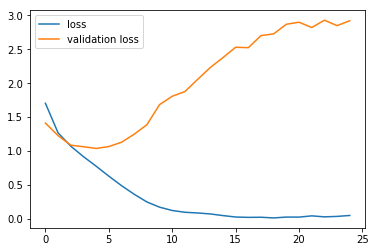

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


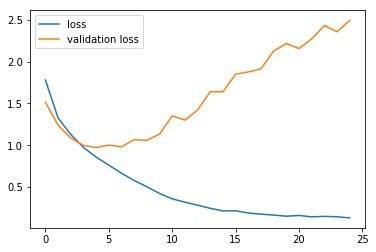

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


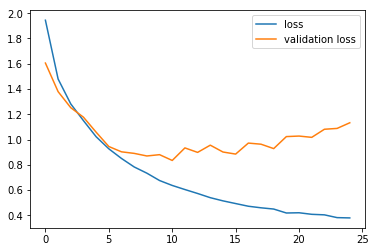

In [0]:
plot("output1.npy")
plot("output2.npy")
plot("output3.npy")
plot("output4.npy")

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


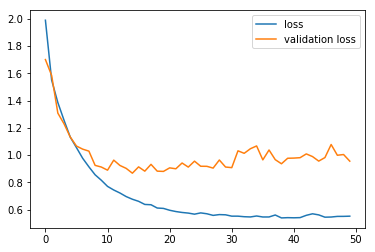

### OBSERVATION 
- Adding more convolution layers and making the network deeper improves the performance (as seen by lower validation loss)

### Model5 : 1 convolution layer with Adam optimizer

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam()
es = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=0,
                           verbose=1,
                           mode='min')

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, \
                    batch_size=64, validation_split=0.2, verbose=True, callbacks=[es])

model.save("model5.h5")
np.save("output5.npy", history.history)

_, acc = model.evaluate(x_test, y_test, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 8s 203us/sample - loss: 1.4334 - acc: 0.4881 - val_loss: 1.2062 - val_acc: 0.5792
Epoch 2/25
40000/40000 [==============================] - 8s 196us/sample - loss: 1.0740 - acc: 0.6236 - val_loss: 1.0539 - val_acc: 0.6309
Epoch 3/25
40000/40000 [==============================] - 8s 195us/sample - loss: 0.9023 - acc: 0.6848 - val_loss: 0.9625 - val_acc: 0.6669
Epoch 4/25
40000/40000 [==============================] - 8s 191us/sample - loss: 0.7756 - acc: 0.7312 - val_loss: 0.9596 - val_acc: 0.6707
Epoch 5/25
40000/40000 [==============================] - 8s 191us/sample - loss: 0.6638 - acc: 0.7689 - val_loss: 0.9484 - val_acc: 0.6836
Epoch 6/25
40000/40000 [==============================] - 8s 197us/sample - loss: 0.5563 - acc: 0.8070 - val_loss: 0.9835 - val_acc: 0.6843
Epoch 00006: early stopping
10000/10000 [==============================] - 1s 145us/sample - loss: 0.9939 - ac

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam()
es = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=0,
                           verbose=1,
                           mode='min')

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, \
                    batch_size=64, shuffle=True, validation_split=0.2, verbose=True, callbacks=[es])

model.save("model6.h5")
np.save("output6.npy", history.history)

_, acc = model.evaluate(x_test, y_test, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
37696/40000 [===========================>..] - ETA: 0s - loss: 1.5059 - acc: 0.4531

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


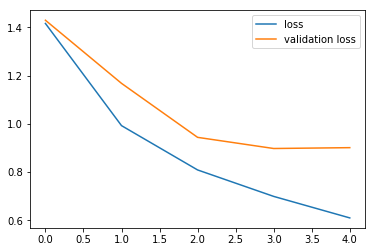

In [0]:
plot('output6.npy')